# Import Nessary Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adamax
import warnings
warnings.filterwarnings('ignore')

# Data Representation 

In [4]:
df=pd.read_csv("C:/Users/MINA/Desktop/Instant Ai Diploma/Projects/Graduation Project/Diabietes/diabetes_prediction_dataset.csv")
df=df[df["gender"]!="Other"]
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


In [88]:
df["diabetes"].value_counts()

0    91482
1     8500
Name: diabetes, dtype: int64

# Data Wrangling(Data Cleaning)

# Check Nulls

In [4]:
df.isna().sum() 

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Check Duplicated 

In [5]:
df.duplicated().sum()

3854

# Drop Duplication

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()   

0

# Check Outliers

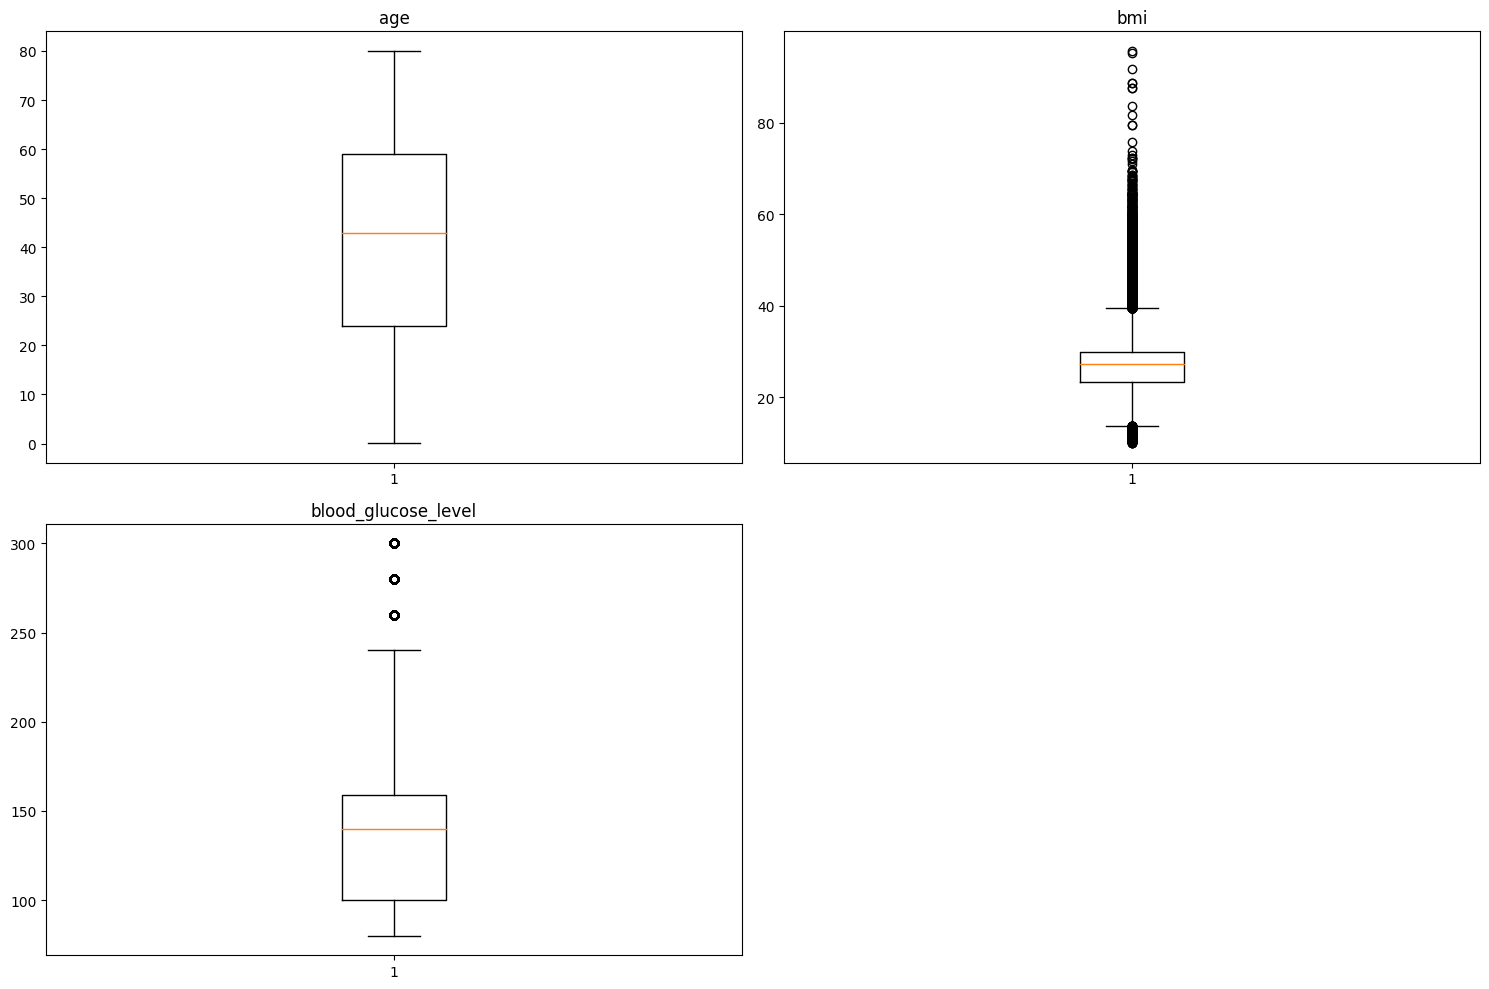

In [8]:
plt.figure(figsize=(15,10))
numeric_columns=["age","bmi","blood_glucose_level"]
for i in numeric_columns:
    plt.subplot(2,2,numeric_columns.index(i)+1)
    plt.boxplot(df[i])
    plt.title(i)
plt.tight_layout()
plt.show()

# Exist Outlier Values But isnot effect to  model becouse need model identify the outlier values becouse is exist in life

# EDA

In [9]:
GC=df["gender"].value_counts()
GC

Female    56161
Male      39967
Name: gender, dtype: int64

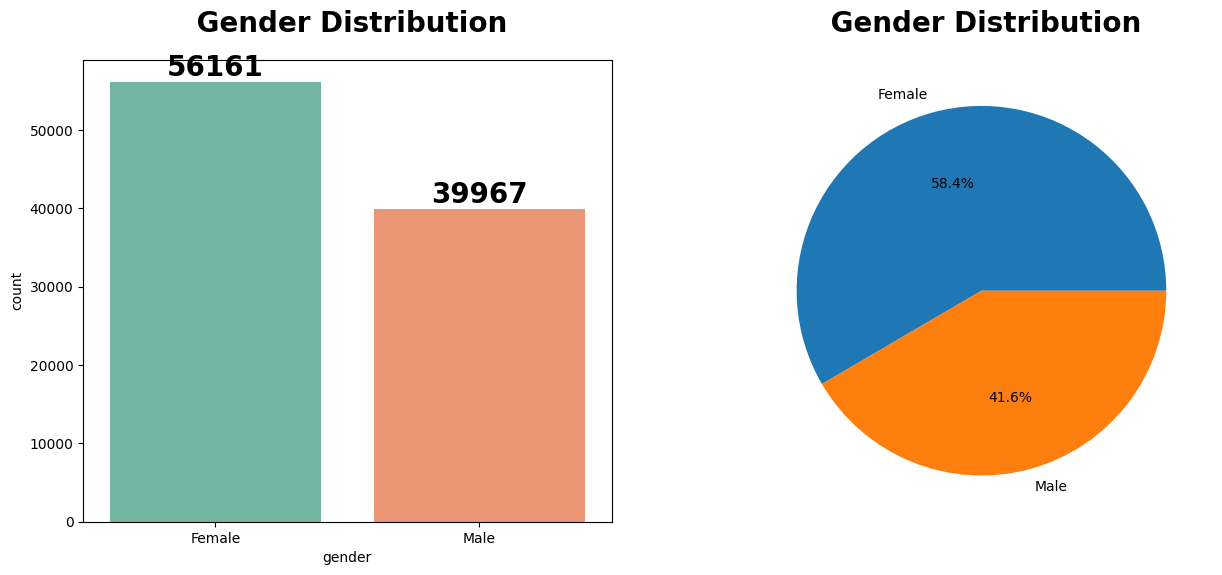

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x="gender",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)

plt.title(" Gender Distribution",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(GC.values,labels=GC.index,autopct="%1.1f%%",colors=sns.set_palette("Set2"))
plt.title(" Gender Distribution",fontweight="black",size=20,pad=20)
plt.show()

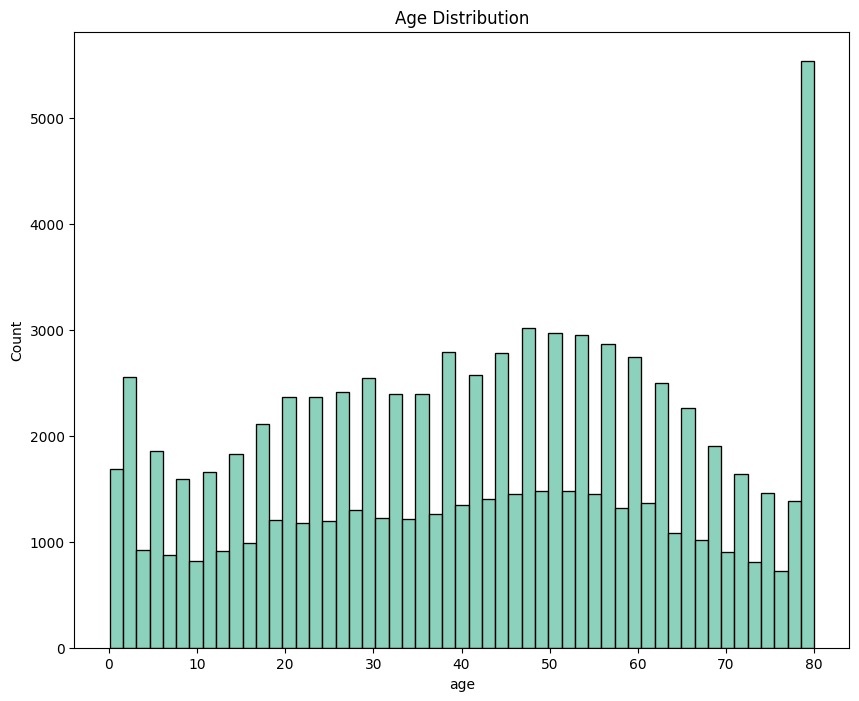

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(df["age"],fill=True,palette="Set2")
plt.title("Age Distribution")
plt.show()

In [12]:
cg=df["hypertension"].value_counts()
cg

0    88667
1     7461
Name: hypertension, dtype: int64

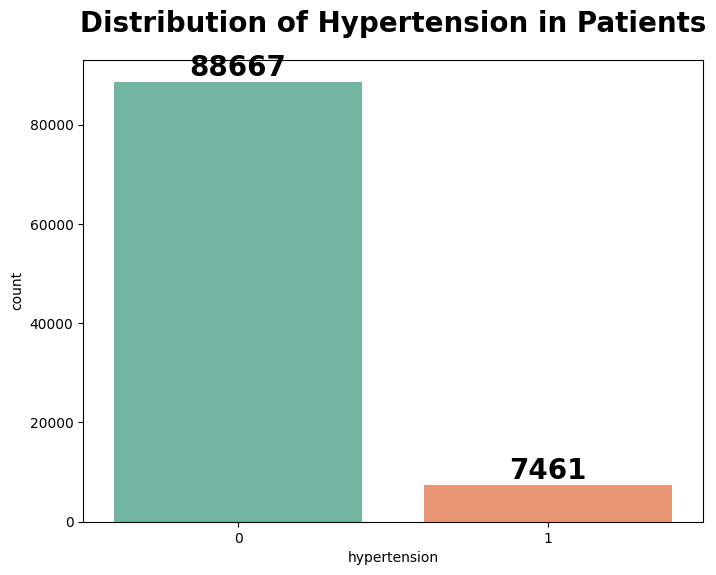

In [13]:
plt.figure(figsize=(8,6))
plt.title("Distribution of Hypertension in Patients",fontsize=20,fontweight="bold",pad=20)
ax=sns.countplot(data=df,x="hypertension",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
plt.show()

In [14]:
cg=df["heart_disease"].value_counts()
cg

0    92205
1     3923
Name: heart_disease, dtype: int64

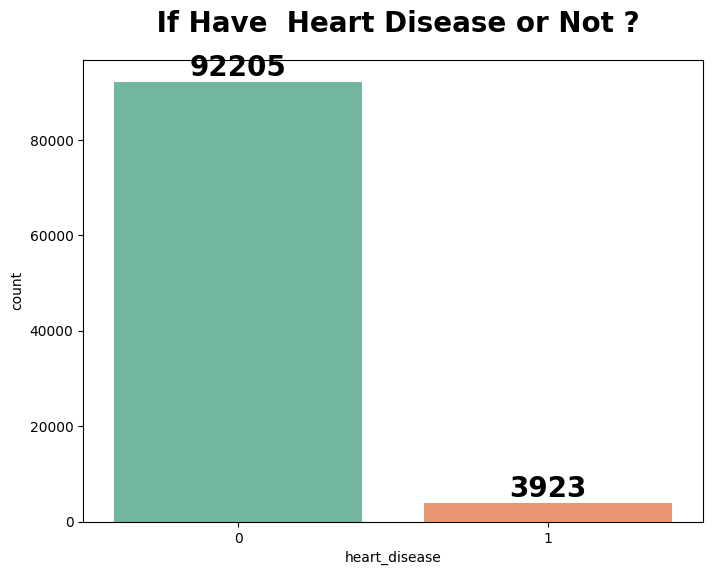

In [15]:
plt.figure(figsize=(8,6))
plt.title(" If Have  Heart Disease or Not ?",fontsize=20,fontweight="bold",pad=20)
ax=sns.countplot(data=df,x="heart_disease",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
plt.show()

In [16]:
Gc=df["smoking_history"].value_counts()
Gc

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

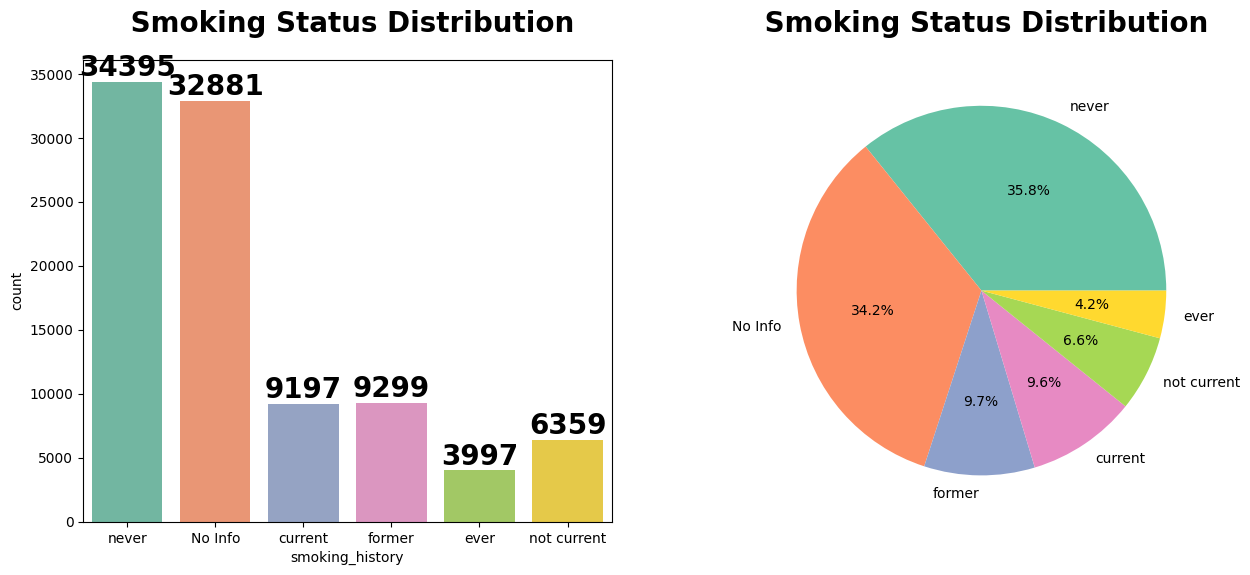

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df,x="smoking_history",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=20)
ax.bar_label(ax.containers[1],fontweight="black",size=20)
ax.bar_label(ax.containers[2],fontweight="black",size=20)
ax.bar_label(ax.containers[3],fontweight="black",size=20)
ax.bar_label(ax.containers[4],fontweight="black",size=20)
ax.bar_label(ax.containers[5],fontweight="black",size=20)

plt.title(" Smoking Status Distribution",fontweight="black",size=20,pad=20)
plt.subplot(1,2,2)
plt.pie(Gc.values,labels=Gc.index,autopct="%1.1f%%",colors=sns.set_palette("Set2"))
plt.title(" Smoking Status Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [18]:
df["bmi"].describe()

count    96128.000000
mean        27.321450
std          6.767811
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64

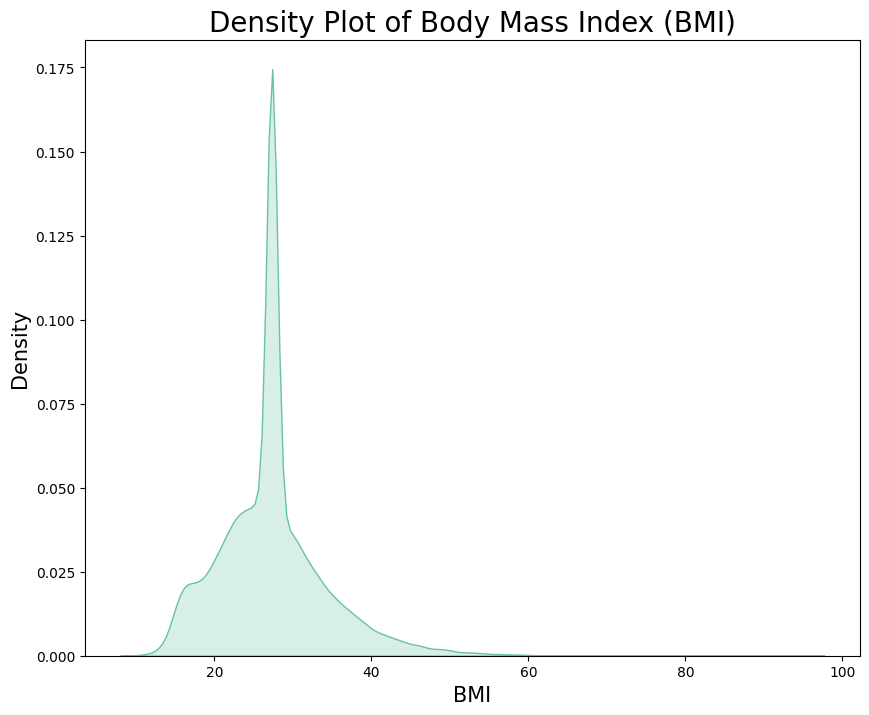

In [19]:
plt.figure(figsize=(10,8))
sns.kdeplot(df["bmi"],fill=True,palette="Set2")
plt.title("Density Plot of Body Mass Index (BMI)",fontsize=20)
plt.xlabel("BMI",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

# ***
# أقل من 5.7%: مستوى طبيعي (لا يوجد خطر للسكري).
# من 5.7% إلى 6.4%: مرحلة ما قبل السكري (خطر الإصابة بالسكري مرتفع).
# 6.5% أو أكثر: مؤشر للإصابة بالسكري (يجب التأكيد من خلال اختبارات إضافية).
# ***


In [20]:
GC=df["HbA1c_level"].value_counts()
GC

6.6    8161
5.7    8123
6.5    8051
5.8    7992
6.0    7987
6.2    7956
6.1    7712
3.5    7316
4.8    7296
4.5    7289
4.0    7204
5.0    7153
8.8     660
8.2     659
9.0     652
7.5     642
6.8     642
7.0     633
Name: HbA1c_level, dtype: int64

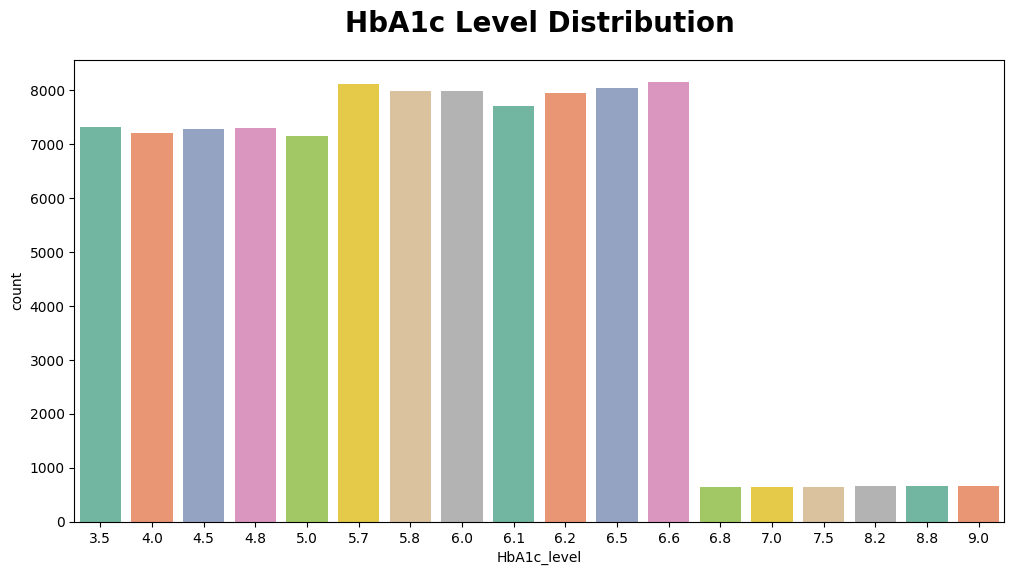

In [21]:
plt.figure(figsize=(12,6))
ax=sns.countplot(data=df,x="HbA1c_level",palette="Set2")
plt.title("HbA1c Level Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [22]:
df["blood_glucose_level"].describe()

count    96128.000000
mean       138.218001
std         40.911190
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

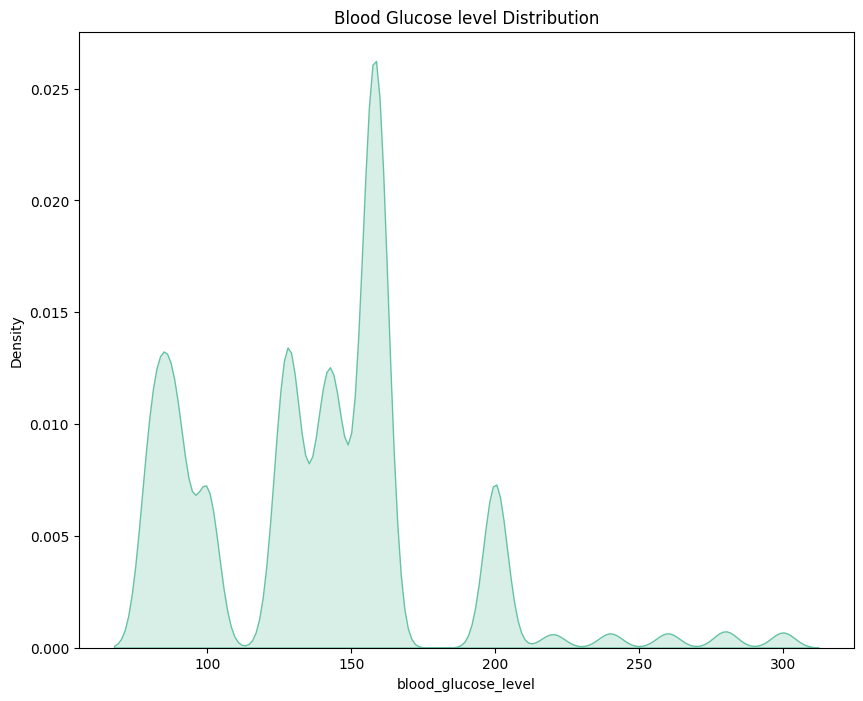

In [23]:
plt.figure(figsize=(10,8))
sns.kdeplot(df["blood_glucose_level"],fill=True,palette="Set2")
plt.title("Blood Glucose level Distribution")
plt.show()

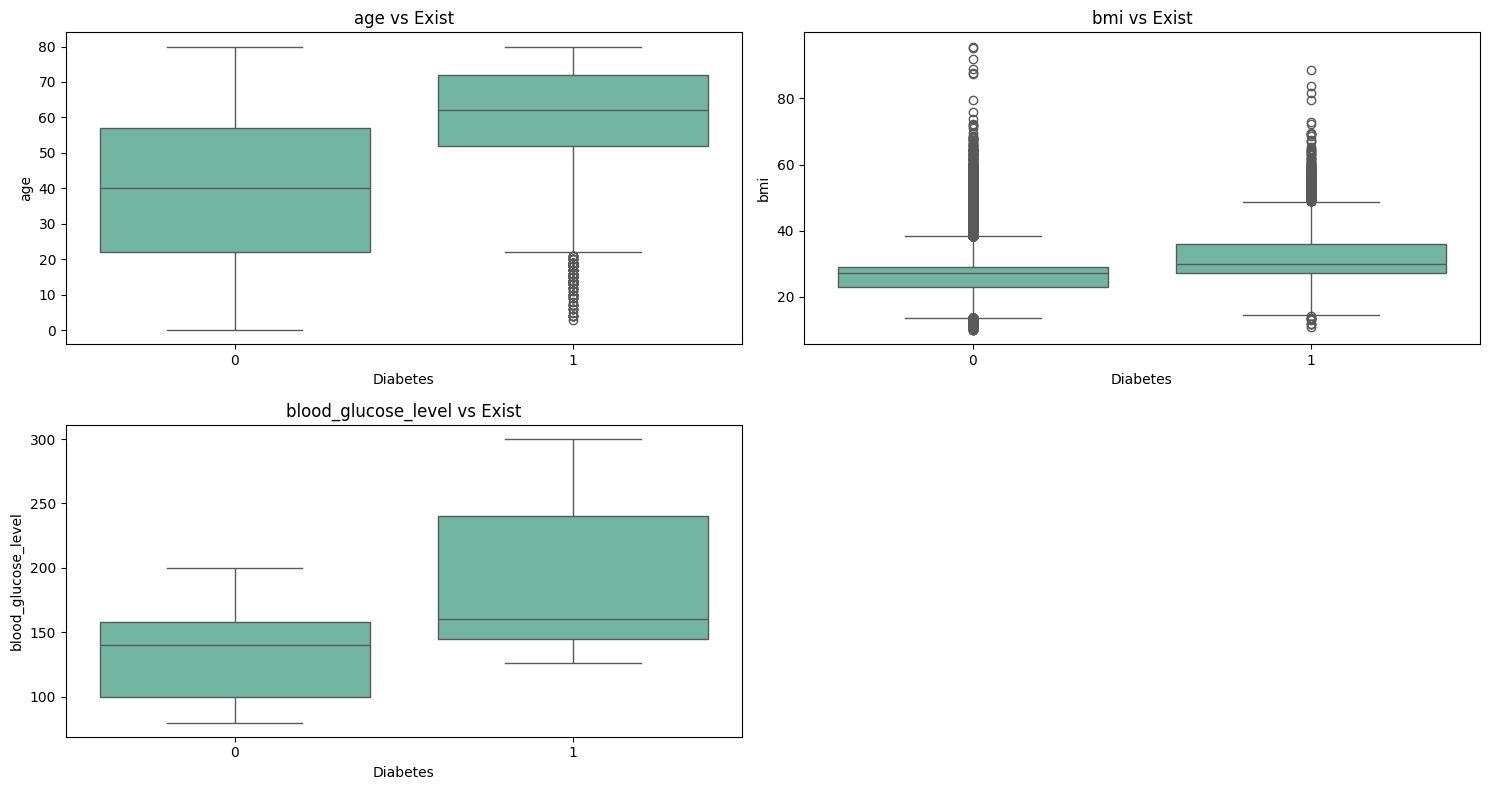

In [24]:
numeric_columns=["age","bmi","blood_glucose_level"]
plt.figure(figsize=(15,8))
for i ,feature in enumerate(numeric_columns,start=1):
    plt.subplot(2,2,i)
    sns.boxplot(x="diabetes",y=feature,data=df)
    plt.xlabel("Diabetes")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Exist")
plt.tight_layout()    
plt.show()   

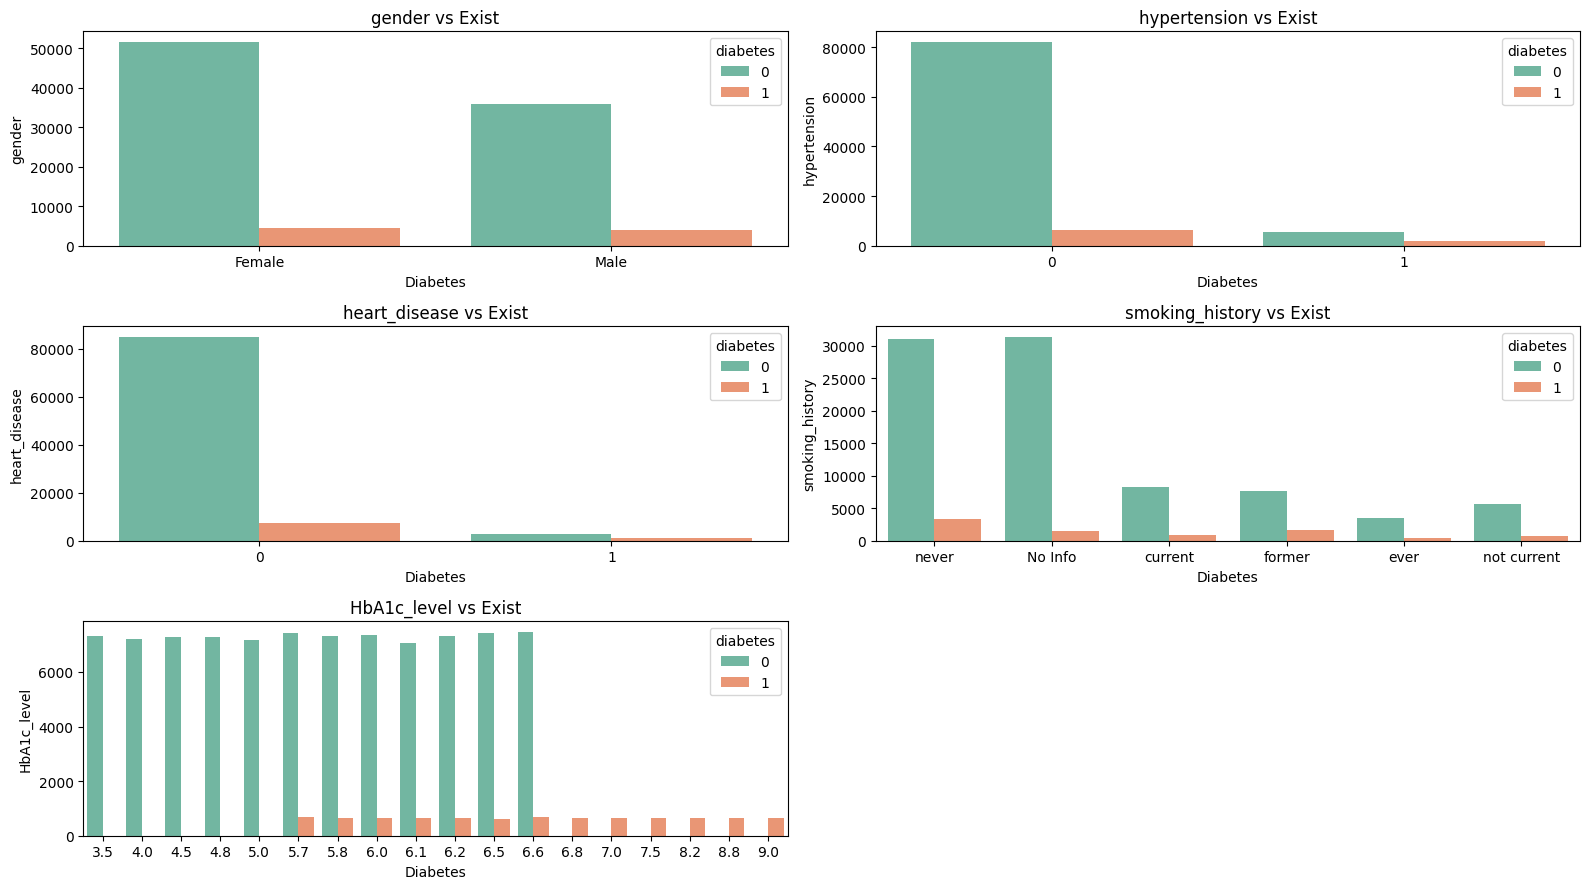

In [25]:
categorical=["gender","hypertension","heart_disease","smoking_history","HbA1c_level"]
plt.figure(figsize=(16,9))
for i ,feature in enumerate(categorical,start=1):
    plt.subplot(3,2,i)
    sns.countplot(x=feature,hue="diabetes",data=df)
    plt.xlabel("Diabetes")
    plt.ylabel(feature)
    plt.title(f"{feature} vs Exist")
plt.tight_layout()    
plt.show()   

<Axes: >

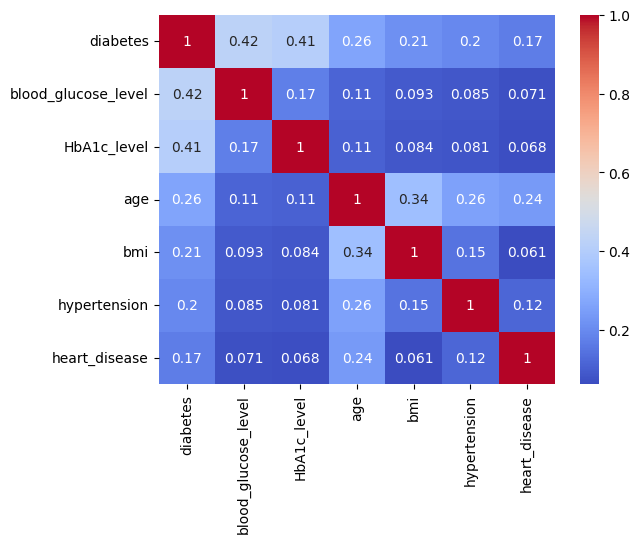

In [26]:
cm = df.corr()['diabetes'].sort_values(ascending=False)
sns.heatmap(df[cm.index].corr(), annot=True, cmap='coolwarm')   


# Preprocessing

In [26]:
df["diabetes"].value_counts()

0    91482
1     8500
Name: diabetes, dtype: int64

# Define X Feature and y Target
 

In [9]:
selected_feature=["HbA1c_level","blood_glucose_level","bmi","age","hypertension","heart_disease"]


In [10]:
X=df[selected_feature]
y=df["diabetes"]

#  Data Scaling

In [13]:
scaler=StandardScaler()
X=scaler.fit_transform(X)


# Split Data

In [66]:
X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [67]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# تطبيق SMOTE لزيادة العينات من الفئة الأقل
smote = SMOTE(sampling_strategy=0.99, random_state=42)  # نجعل الفئة الأقل تمثل 50% من الفئة الأكبر
X_train, y_train = smote.fit_resample(X_train1, y_train1)

# طباعة التوزيع بعد SMOTE
print("قبل SMOTE:", Counter(y_train1))
print("بعد SMOTE:", Counter(y_train))


قبل SMOTE: Counter({0: 73185, 1: 6800})
بعد SMOTE: Counter({0: 73185, 1: 72453})


# Feature  Weigths

In [68]:

weights = {
    'HbA1c_level': 6,  
    'blood_glucose_level': 5,  
    'bmi': 2, 
    'age': 2,  
    'hypertension': 2,
    'heart_disease': 2  
}


# Modeling

In [58]:

param_grid = {
    'n_estimators': [50, 100, 200,300],  # عدد الأشجار
    'learning_rate': [0.01, 0.1, 0.2,0.9],  # معدل التعلم
    'max_depth': [3, 5, 7,9],  # عمق الشجرة
    'subsample': [0.8, 1],  # نسبة استخدام البيانات لكل شجرة
    'colsample_bytree': [0.8, 1]  # نسبة استخدام الميزات لكل شجرة
}

# إنشاء نموذج XGBClassifier
xgb_model = XGBClassifier()

# تطبيق GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # يمكنك تغييرها إلى f1 أو recall حسب الحاجة
    cv=5,  # عدد الـ folds
    n_jobs=-1,  # استخدام جميع المعالجات لتسريع العملية
    verbose=2
)

# **تمرير الأوزان يدويًا أثناء fit**
grid_search.fit(X_train, y_train, **{"feature_weights": list(weights.values())})

# أفضل المعلمات
print("أفضل المعلمات:", grid_search.best_params_)

# أفضل نموذج بعد البحث
best_model = grid_search.best_estimator_

# التقييم
y_pred = best_model.predict(X_test)
print("\nAccuracy",accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
أفضل المعلمات: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1}

Accuracy 0.9678951842776417


In [59]:
model=best_model
y_predict=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("دقة النموذج:", accuracy)

print(classification_report(y_test, y_pred))

دقة النموذج: 0.9678951842776417
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18222
           1       0.92      0.70      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.94      0.85      0.89     19997
weighted avg       0.97      0.97      0.97     19997



# Anthor models

In [69]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [70]:
y_pre=xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pre)
print("دقة النموذج:", accuracy)

print(classification_report(y_test, y_pre))

دقة النموذج: 0.9690953643046457
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.91      0.71      0.80      1700

    accuracy                           0.97     19997
   macro avg       0.94      0.85      0.89     19997
weighted avg       0.97      0.97      0.97     19997



# Anthor Model

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)




RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
y_prrrrrr=rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_prrrrrr)
print("دقة النموذج:", accuracy)

print(classification_report(y_test, y_prrrrrr))

دقة النموذج: 0.9587438115717357
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18297
           1       0.77      0.74      0.75      1700

    accuracy                           0.96     19997
   macro avg       0.87      0.86      0.87     19997
weighted avg       0.96      0.96      0.96     19997



In [73]:
svm_model = SVC(class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [74]:
y_pree=svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pree)
print("دقة النموذج:", accuracy)

print(classification_report(y_test, y_pree))

دقة النموذج: 0.8895334300145021
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18297
           1       0.43      0.92      0.59      1700

    accuracy                           0.89     19997
   macro avg       0.71      0.90      0.76     19997
weighted avg       0.94      0.89      0.91     19997

